# Random Forest Bill Authentication Data

In [1]:
## Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Bill_Auth_data = pd.read_csv('bill_authentication.csv')
Bill_Auth_data.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [3]:
Bill_Auth_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variance  1372 non-null   float64
 1   Skewness  1372 non-null   float64
 2   Curtosis  1372 non-null   float64
 3   Entropy   1372 non-null   float64
 4   Class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [4]:
Bill_Auth_data = Bill_Auth_data.sample(frac=1.0).reset_index(drop=True)
Bill_Auth_data.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.94790,-3.7723,2.8830,0.019813,0
1,3.88460,-3.0336,2.5334,0.202140,0
2,0.54150,6.0319,1.6825,-0.461220,0
3,0.56232,1.0015,-2.2726,-0.006049,1
4,3.18360,7.2321,-1.0713,-2.590900,0


In [5]:
Bill_Auth_data.describe()

,Variance,Skewness,Curtosis,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efc8a134410>,
      dtype=object)

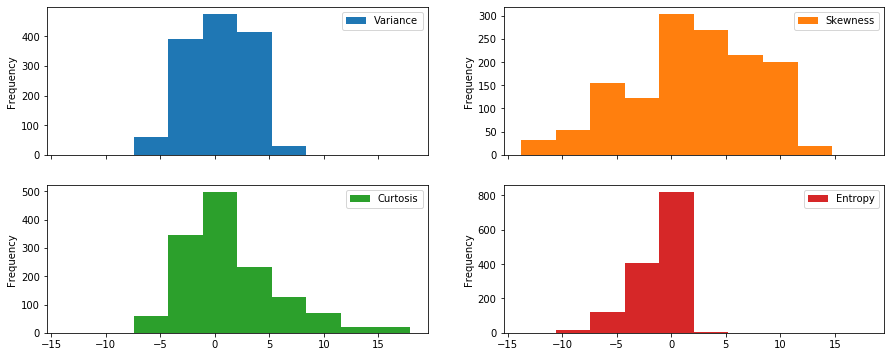

In [6]:
Bill_Auth_data.iloc[:,0:-1].plot(kind='hist',subplots=True,layout=(2,2),figsize=(15,6))

Variance       AxesSubplot(0.125,0.536818;0.352273x0.343182)
Skewness    AxesSubplot(0.547727,0.536818;0.352273x0.343182)
Curtosis          AxesSubplot(0.125,0.125;0.352273x0.343182)
Entropy        AxesSubplot(0.547727,0.125;0.352273x0.343182)
dtype: object

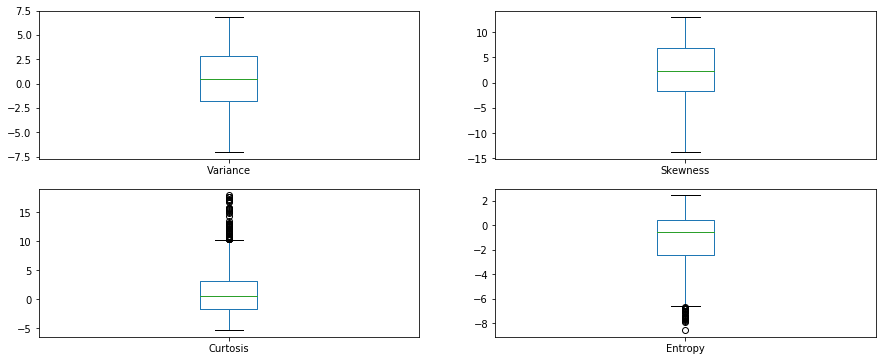

In [7]:
Bill_Auth_data.iloc[:,0:-1].plot(kind='box',subplots=True,layout=(2,2),figsize=(15,6))

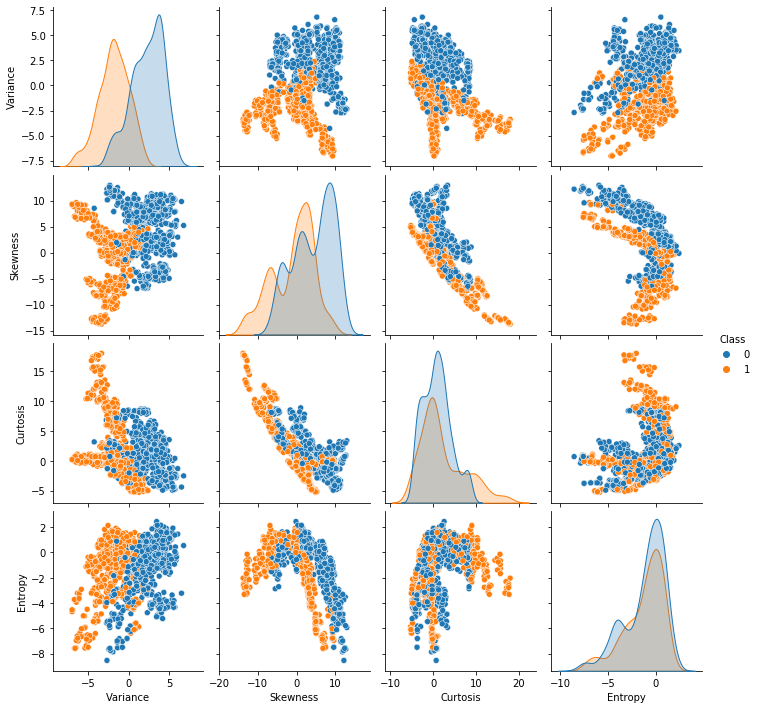

In [8]:
sns.pairplot(data=Bill_Auth_data,hue='Class');

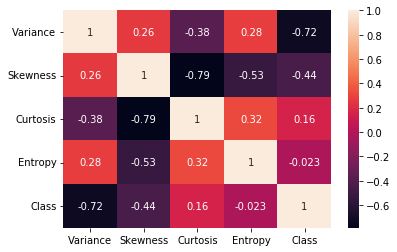

In [9]:
sns.heatmap(Bill_Auth_data.corr(), annot = True);

In [10]:
from sklearn.preprocessing import RobustScaler

X = Bill_Auth_data.drop('Class', axis = 1)
Y = Bill_Auth_data['Class']

RS = RobustScaler()
X = RS.fit_transform(X)

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 10)

In [12]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier()
RFC.fit(X_train, Y_train)

Y_pred = RFC.predict(X_test)

# Accuracy of the Model

In [13]:
from sklearn import metrics

print(metrics.accuracy_score(Y_test, Y_pred))

0.9927272727272727


# Confusion Matrics

In [14]:
print(metrics.confusion_matrix(Y_test, Y_pred))

[[152   2]
 [  0 121]]


# Classification Report

In [15]:
print(metrics.classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       154
           1       0.98      1.00      0.99       121

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275

